<a href="https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/main/Modulo%205%20-%20Deep%20Leaning/code/DL_09_AE_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# GOALS:
# - Train ourselves on unsupervised deep learning.
# - Train ourselves on the use of autoencoders (AE).
# - Use an AE to estimate latent representations of some numeric data.
# - Use those latent representations to detect anomalies (abnormal data).

In [ ]:
# Data set: https://www.kaggle.com/mlg-ulb/creditcardfraud
# https://www.kaggle.com/mlg-ulb/creditcardfraud/download
#
# The datasets contains transactions made by credit cards in September 2013 by european cardholders.
# This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
# The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
#
# It contains only numerical input variables which are the result of a PCA transformation (privacy reasons).
# Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are
# 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
# The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud
# and 0 otherwise.

# Part 1: Load data

In [ ]:
# Load data
df = pd.read_csv("creditcard.csv")
print(df.shape)

# Remueve entries with nan values
df.dropna(inplace=True)
df.isnull().values.any()

(284807, 31)


False

In [ ]:
# Show a summary
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Note classes are not balanced at all
classes_count = pd.value_counts(df['Class'], sort = True)
classes_count

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# summary of class 0 (normal transactions)
df[df.Class == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# summary of class 1 (abnormal transactions)
df[df.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

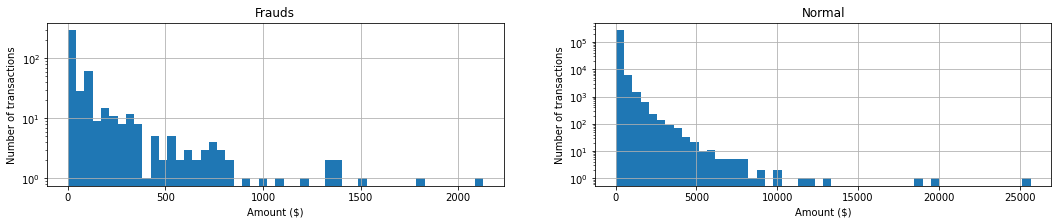

In [ ]:
# Plot amount of normal and abnormal data
plt.figure(figsize=(18, 3))

plt.subplot(1, 2, 1)
plt.title('Frauds')
plt.hist(df[df.Class == 1].Amount, bins=50)
plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.yscale('log')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Normal')
plt.hist(df[df.Class == 0].Amount, bins=50)
plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.yscale('log')
plt.grid()

plt.show()

In [ ]:
# Remove time
df = df.drop(['Time'], axis=1)
print(df.shape)

(284807, 30)


In [ ]:
# Extract into matrices values for normal transactions
normal = df[df.Class == 0]
normal = normal.drop(['Class'], axis=1)
normal = normal.values
print(normal.shape)

# Extract into matrices values for normal transactions
frauds = df[df.Class == 1]
frauds = frauds.drop(['Class'], axis=1)
frauds = frauds.values
print(frauds.shape)

(284315, 29)
(492, 29)


In [ ]:
# Normalize data
scaler = StandardScaler()
normal = scaler.fit_transform(normal)
frauds = scaler.transform(frauds)

# See max and min values, so we can decide on output activations
print(normal.min(axis=0))
print(normal.max(axis=0))

[-29.23383553 -44.43954405 -33.1210661   -4.05573252 -83.82683084
 -19.67269346 -26.9547933  -63.04736881  -5.77875015 -14.1265026
  -4.77604318 -16.02201219  -5.8207973  -20.51734046  -4.79911288
 -11.98281313 -22.82988537  -6.51040776  -8.88513979 -70.83041283
 -48.59368815 -15.107939   -72.09157992  -4.68293974 -19.77314077
  -5.40075462 -56.43521184 -46.81853823  -0.35301631]
[  1.26783021  11.55688816   6.42059588  12.06519875  25.6429718
  55.11588798 102.28946604  16.11172234  14.31150875  22.73057889
   9.97773414   8.28549613   7.16203997  11.72201079   9.70165636
  20.48834873  12.33161046   6.10628824   6.89039166  51.23659381
  31.55405666  14.5137363   36.24600145   7.56776948  14.44221515
   7.29394756  79.06170547 102.70355447 102.36862343]


In [ ]:
# Split normal data into training and test data
x_train, x_test = train_test_split(normal, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(227452, 29)
(56863, 29)


# Part 2: Train a model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l1

In [ ]:
# Create model
in_layer = Input(shape=(x_train.shape[1],))

encoder = Dense(512, activation='relu')(in_layer)
encoder = Dense(256, activation='relu')(encoder)
encoder = Dense(128, activation='relu')(encoder)
encoder = Dense(64, activation='relu')(encoder)

latent  = Dense(32,  activation='relu', activity_regularizer=l1(9e-4), name='latent')(encoder)

decoder = Dense(64, activation='relu')(latent)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(256, activation='relu')(decoder)
decoder = Dense(512, activation='relu')(decoder)

out_layer = Dense(x_train.shape[1])(decoder)

AE = Model(inputs=in_layer, outputs=out_layer)
AE.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 29)]              0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               15360     
_________________________________________________________________
dense_55 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_56 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_57 (Dense)             (None, 64)                8256      
_________________________________________________________________
latent (Dense)               (None, 32)                2080      
_________________________________________________________________
dense_58 (Dense)             (None, 64)                211

In [ ]:
# Compile and train
AE.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = AE.fit(x_train, x_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
1422/1422 [==============================] - 17s 12ms/step - loss: 0.1919 - accuracy: 0.7014 - val_loss: 0.0598 - val_accuracy: 0.8413
Epoch 2/100
1422/1422 [==============================] - 16s 11ms/step - loss: 0.0789 - accuracy: 0.8143 - val_loss: 0.0861 - val_accuracy: 0.8268
Epoch 3/100
1422/1422 [==============================] - 16s 11ms/step - loss: 0.0902 - accuracy: 0.8071 - val_loss: 0.0442 - val_accuracy: 0.8610
Epoch 4/100
1422/1422 [==============================] - 16s 11ms/step - loss: 0.0586 - accuracy: 0.8394 - val_loss: 0.1188 - val_accuracy: 0.7439
Epoch 5/100
1422/1422 [==============================] - 16s 11ms/step - loss: 0.0698 - accuracy: 0.8307 - val_loss: 0.1069 - val_accuracy: 0.7771
Epoch 6/100
1422/1422 [==============================] - 16s 11ms/step - loss: 0.0740 - accuracy: 0.8269 - val_loss: 0.0354 - val_accuracy: 0.8760
Epoch 7/100
1422/1422 [==============================] - 16s 12ms/step - loss: 0.0498 - accuracy: 0.8520 - val_loss: 0

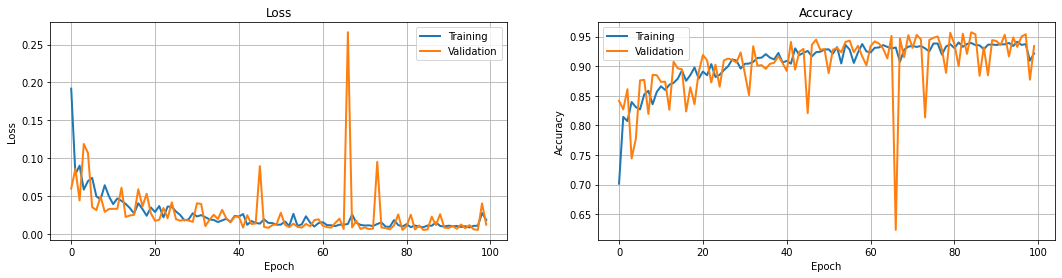

In [ ]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# Predict reconstruction error on training data
x_train_hat = AE.predict(x_train)
mse_train = np.mean(np.power(x_train - x_train_hat, 2), axis=1)

print(f"Min : {mse_train.min():0.6f}")
print(f"Mean: {mse_train.mean():0.4f}")
print(f"Stdd: {mse_train.std():0.2f}")
print(f"Max : {mse_train.max():0.2f}")

Min : 0.000092
Mean: 0.0106
Stdd: 0.14
Max : 49.69


In [ ]:
# Predict reconstruction error on test data
x_test_hat = AE.predict(x_test)
mse_test = np.mean(np.power(x_test - x_test_hat, 2), axis=1)

print(f"Min : {mse_test.min():0.6f}")
print(f"Mean: {mse_test.mean():0.4f}")
print(f"Stdd: {mse_test.std():0.2f}")
print(f"Max : {mse_test.max():0.2f}")

Min : 0.000094
Mean: 0.0118
Stdd: 0.11
Max : 9.53


In [ ]:
# Predict reconstruction error on abnormal data
frauds_hat = AE.predict(frauds)
mse_frauds = np.mean(np.power(frauds - frauds_hat, 2), axis=1)

print(f"Min : {mse_frauds.min():0.6f}")
print(f"Mean: {mse_frauds.mean():0.4f}")
print(f"Stdd: {mse_frauds.std():0.2f}")
print(f"Max : {mse_frauds.max():0.2f}")

Min : 0.000364
Mean: 5.4791
Stdd: 12.62
Max : 98.64


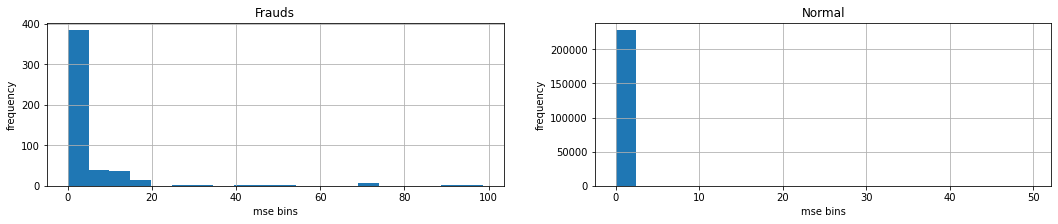

In [ ]:
# Plot distribution of reconstruction errors
plt.figure(figsize=(18, 3))

plt.subplot(1, 2, 1)
plt.title('Frauds')
plt.hist(mse_frauds, bins=20)
plt.xlabel('mse bins')
plt.ylabel('frequency')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Normal')
plt.hist(mse_train, bins=20)
plt.xlabel('mse bins')
plt.ylabel('frequency')
plt.grid()

plt.show()

# Part 3: Latent space

In [ ]:
# Create a submodel using only the encoder part of previous model (output must be latent layer)
encoder_model = Model(inputs=in_layer, outputs=latent)
encoder_model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 29)]              0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               15360     
_________________________________________________________________
dense_55 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_56 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_57 (Dense)             (None, 64)                8256      
_________________________________________________________________
latent (Dense)               (None, 32)                2080      
Total params: 189,920
Trainable params: 189,920
Non-trainable params: 0
____________________________________________________

In [ ]:
# Predict a latent representation for the test set and the frauds set
latent_normal = encoder_model.predict(x_test)
latent_frauds = encoder_model.predict(frauds)

print(latent_normal.shape)
print(latent_frauds.shape)

(56863, 32)
(492, 32)


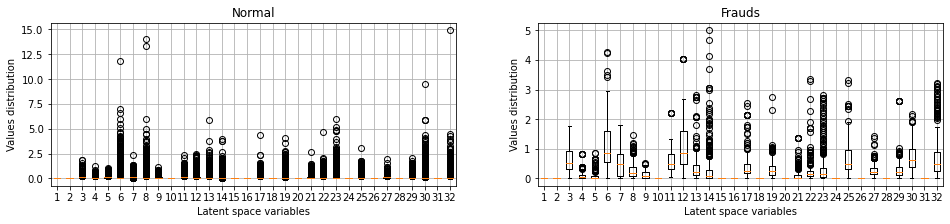

In [ ]:
# Plot distribution of latent space
plt.figure(figsize=(16, 3))
plt.subplot(1, 2, 1)
plt.title('Normal')
plt.boxplot(latent_normal)
plt.xlabel('Latent space variables')
plt.ylabel('Values distribution')
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Frauds')
plt.boxplot(latent_frauds)
plt.xlabel('Latent space variables')
plt.ylabel('Values distribution')
plt.grid()
plt.show()

In [ ]:
# == Q ==
# 1. Diseña un AE que obtenga pérdida menor o igual 0.01 tanto en entrenamiento como validación.
#    Reporta tu arquitectura.
# 2. ¿Existe alguna relación entre la profundidad del AE y la pérdida final?
# 3. ¿Existe alguna relación entre la profundidad del AE y la separación resultante
#    entre los espacios latentes de los datos normales y anormales?
# 4. ¿Existe alguna relación entre el número elementos en el espacio latente y la pérdida final?
# 5. ¿Existe alguna relación entre el número elementos en el espacio latente y la separación resultante
#    entre los espacios latentes de los datos normales y anormales?
# 6. Intenta forzar el espacio latente para que sea ralo. Reporta tu mejor modelo y 
#    el desempeño que obtenga, tanto en pérdida como en capacidad de diferenciar datos anormales.

In [ ]:
#
#np.abs(latent_normal).sum(axis=1).mean()

print("Other tries:")
print("0    -- 32.66")
print("9e-5 --  7.19")
print("9e-4 --  1.40")
print("3e-4 --  3.03")

Other tries:
0    -- 32.66
9e-5 --  7.19
9e-4 --  1.40
3e-4 --  3.03


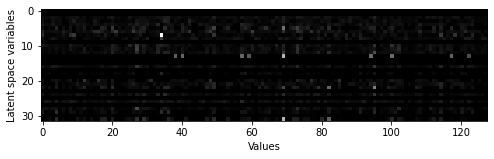

In [ ]:
# Plot distribution of latent space
IMG = latent_normal[:128].copy()
IMG = IMG / IMG.max()

plt.figure(figsize=(8, 3))
plt.imshow(IMG.T, cmap='gray')
plt.ylabel('Latent space variables')
plt.xlabel('Values')
plt.show()